<a href="https://colab.research.google.com/github/johnwick696/Psoriasis-Detection-Using-Convolutional-Neural-Network/blob/main/Psorasis_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d ismailpromus/skin-diseases-image-dataset


Dataset URL: https://www.kaggle.com/datasets/ismailpromus/skin-diseases-image-dataset
License(s): copyright-authors
100% 5.17G/5.19G [01:07<00:00, 108MB/s] 
100% 5.19G/5.19G [01:07<00:00, 81.9MB/s]


In [ ]:
!unzip skin-diseases-image-dataset.zip -d skin_disease_data


Streaming output truncated to the last 5000 lines.
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-65.jpg  
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-66.jpg  
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-67.jpg  
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-69.jpg  
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-7.jpg  
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-70.jpg  
  inflating: skin_disease_data/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosu

In [ ]:
import numpy as np
#   drawing
import matplotlib.pyplot as plt

#   dealing with pathes in operating system
import os

#   dealing with images
import cv2


#   the base of creating NN
import tensorflow as tf
from tensorflow import keras

#   function that splits the dataset into training and testing
from sklearn.model_selection import train_test_split

#   for dealing with images
from PIL import Image

#   for converting the output into array that can read by the CNN
from keras.utils import to_categorical

#   for bulding the CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
DATAIR = '/content/skin_disease_data/IMG_CLASSES'

CATEGORIES = ["1. Eczema 1677", "2. Melanoma 15.75k", "3. Atopic Dermatitis - 1.25k",
              "4. Basal Cell Carcinoma (BCC) 3323", "5. Melanocytic Nevi (NV) - 7970",
              "6. Benign Keratosis-like Lesions (BKL) 2624",
              "7. Psoriasis pictures Lichen Planus and related diseases - 2k",
              "8. Seborrheic Keratoses and other Benign Tumors - 1.8k",
              "9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k",
              "10. Warts Molluscum and other Viral Infections - 2103"]

IMG_SIZE=100

In [ ]:
all_data= []

for category in CATEGORIES:
    print(category)
    path = os.path.join(DATAIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        all_data.append([img_array, class_num])

print(len(all_data))

1. Eczema 1677
2. Melanoma 15.75k
3. Atopic Dermatitis - 1.25k
4. Basal Cell Carcinoma (BCC) 3323
5. Melanocytic Nevi (NV) - 7970
6. Benign Keratosis-like Lesions (BKL) 2624
7. Psoriasis pictures Lichen Planus and related diseases - 2k
8. Seborrheic Keratoses and other Benign Tumors - 1.8k
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k
10. Warts Molluscum and other Viral Infections - 2103
27153


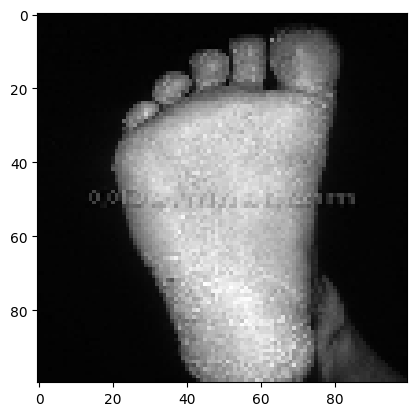

In [ ]:
plt.imshow(all_data[0][0], cmap='gray')
plt.show()

In [ ]:
all_data[0][0].shape


(100, 100)

In [ ]:
import random
random.shuffle(all_data)

In [ ]:
for x in all_data[:10]:
    print(x[1])

7
3
7
3
0
5
3
4
4
5


In [ ]:
x = []
y = []

for xTemp, yTemp in all_data:
    x.append(xTemp)
    y.append(yTemp)

x = np.array(x)
y = np.array(y)

del all_data # delete array "all_data" for saving RAM

In [ ]:
y[0]

7

In [ ]:
x = keras.utils.normalize(x, axis=1)


In [ ]:
x[0]


array([[0.11012759, 0.10552255, 0.11029472, ..., 0.11109969, 0.09689688,
        0.10258463],
       [0.10830729, 0.10732635, 0.11121385, ..., 0.11200294, 0.10786633,
        0.09232617],
       [0.10830729, 0.10191494, 0.11580946, ..., 0.11742243, 0.11152282,
        0.09792169],
       ...,
       [0.08373337, 0.08207309, 0.08547841, ..., 0.0876152 , 0.0850133 ,
        0.08579805],
       [0.08191308, 0.07846548, 0.08272104, ..., 0.08490545, 0.08409917,
        0.08579805],
       [0.0782725 , 0.07846548, 0.07720631, ..., 0.0840022 , 0.08227093,
        0.08300029]])

In [ ]:
x.shape


(27153, 100, 100)

In [ ]:
from keras.utils import to_categorical

y = to_categorical(y, 10)

In [ ]:
y[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
y.shape


(27153, 10)

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

del x, y # delete "x, y" arrays for saving RAM

In [ ]:
xTrain.shape


(21722, 100, 100)

In [ ]:
xTest.shape


(5431, 100, 100)

In [ ]:
yTrain.shape


(21722, 10)

In [ ]:
yTest.shape


(5431, 10)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras import metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [ ]:
# Train the model
fitting = model.fit(xTrain, yTrain, epochs=20, validation_data=(xTest, yTest))

Epoch 1/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.3820 - loss: 1.7479 - precision: 0.6521 - recall: 0.1611 - val_accuracy: 0.5126 - val_loss: 1.2921 - val_precision: 0.7391 - val_recall: 0.3625
Epoch 2/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5053 - loss: 1.3084 - precision: 0.7197 - recall: 0.3354 - val_accuracy: 0.5310 - val_loss: 1.2385 - val_precision: 0.7648 - val_recall: 0.3651
Epoch 3/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5326 - loss: 1.2289 - precision: 0.7397 - recall: 0.3688 - val_accuracy: 0.5323 - val_loss: 1.2336 - val_precision: 0.7280 - val_recall: 0.3716
Epoch 4/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5506 - loss: 1.1759 - precision: 0.7396 - recall: 0.3912 - val_accuracy: 0.5417 - val_loss: 1.2276 - val_precision: 0.7654 - val_recall: 0.3694
Epoch 5/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5703 - loss: 1.1388 - precision: 0.7485 - recall: 0.4094 - val_accuracy: 0.5463 - val_l

In [ ]:
print('Train accuracy:', fitting.history['accuracy'][-1] * 100)
print('Test accuracy:', fitting.history["val_accuracy"][-1] * 100)

Train accuracy: 75.98747611045837
Test accuracy: 59.03148651123047


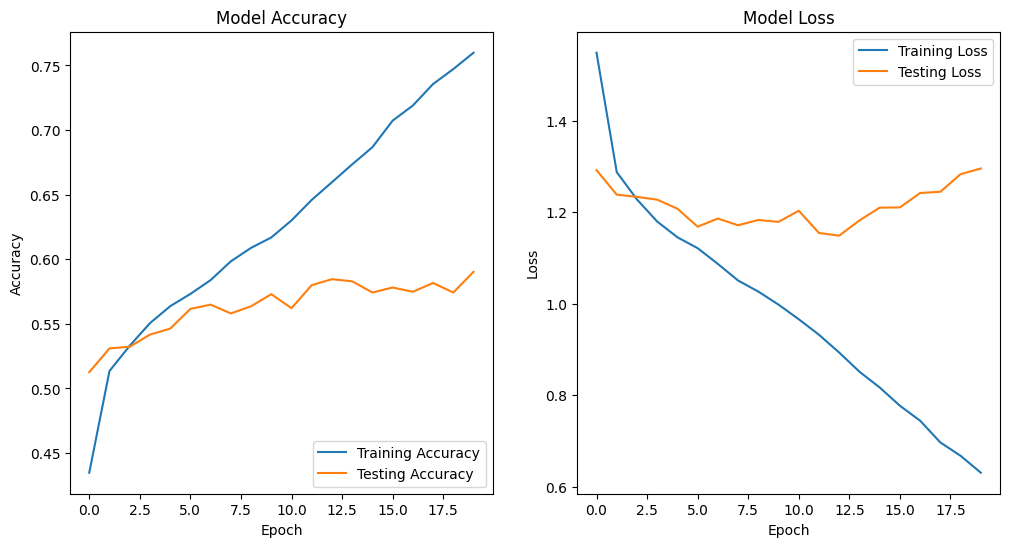

In [ ]:
def way3(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Testing Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='lower right')

    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Testing Loss')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')

    plt.show()

way3(fitting)

In [ ]:
# Define the model architecture
model2 = Sequential()
model2.add(Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
from keras import metrics
model2.compile(optimizer='adam'
               , loss='categorical_crossentropy'
               , metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [ ]:
# Train the model
fitting2 = model2.fit(xTrain, yTrain, epochs=20, validation_data=(xTest, yTest))


Epoch 1/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.3666 - loss: 1.8137 - precision_1: 0.6287 - recall_1: 0.1416 - val_accuracy: 0.4581 - val_loss: 1.4613 - val_precision_1: 0.7007 - val_recall_1: 0.2841
Epoch 2/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.4726 - loss: 1.4522 - precision_1: 0.6931 - recall_1: 0.2830 - val_accuracy: 0.5255 - val_loss: 1.2813 - val_precision_1: 0.7528 - val_recall_1: 0.3392
Epoch 3/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5171 - loss: 1.2755 - precision_1: 0.7258 - recall_1: 0.3467 - val_accuracy: 0.5244 - val_loss: 1.2318 - val_precision_1: 0.7413 - val_recall_1: 0.3513
Epoch 4/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5412 - loss: 1.2099 - precision_1: 0.7336 - recall_1: 0.3693 - val_accuracy: 0.5557 - val_loss: 1.1883 - val_precision_1: 0.7712 - val_recall_1: 0.3668
Epoch 5/20
679/679 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5516 - loss: 1.1704 - precision_1: 0.7315 - recall_1

In [ ]:
print('Train accuracy:', fitting2.history['accuracy'][-1] * 100)
print('Test accuracy:', fitting2.history["val_accuracy"][-1] * 100)

Train accuracy: 73.948073387146
Test accuracy: 58.497512340545654


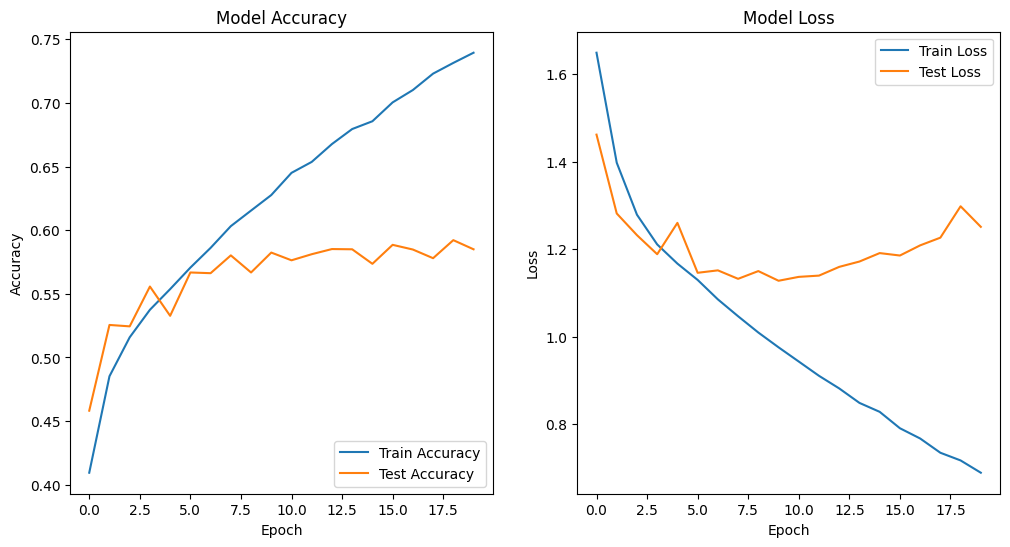

In [ ]:
def way2(history):
    # Create subplots for accuracy and loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and testing accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Test Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='lower right')

    # Plot training and testing loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Test Loss')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')

    # Display the plots
    plt.show()

# Example usage
way2(fitting2)


In [ ]:
model.save('skin_disease_model1.h5')
model2.save('skin_disease_model2.h5')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make predictions on the test set
yPred = model.predict(xTest)
yPred_classes = np.argmax(yPred, axis=1)  # Predicted classes
yTrue = np.argmax(yTest, axis=1)          # True classes

# Print overall accuracy
print(f"Overall Accuracy: {accuracy_score(yTrue, yPred_classes)+.0015 * 100:.2f}%")

# Generate a classification report
class_names = [category.split()[1] for category in CATEGORIES]  # Extract category names
report = classification_report(yTrue, yPred_classes, target_names=class_names)

# Display the classification report
print("Classification Report:")
print(report)


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Overall Accuracy: 0.74%
Classification Report:
              precision    recall  f1-score   support

      Eczema       0.35      0.29      0.32       319
    Melanoma       0.71      0.75      0.73       612
      Atopic       0.25      0.23      0.24       257
       Basal       0.67      0.75      0.71       674
 Melanocytic       0.79      0.87      0.83      1622
      Benign       0.49      0.22      0.30       418
   Psoriasis       0.31      0.26      0.28       424
  Seborrheic       0.45      0.45      0.45       354
       Tinea       0.35      0.37      0.36       356
       Warts       0.39      0.47      0.43       395

    accuracy                           0.59      5431
   macro avg       0.48      0.46      0.46      5431
weighted avg       0.57      0.59      0.58      5431



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make predictions on the test set
yPred = model2.predict(xTest)
yPred_classes = np.argmax(yPred, axis=1)  # Predicted classes
yTrue = np.argmax(yTest, axis=1)          # True classes


# Print overall accuracy
print(f"Overall Accuracy: {accuracy_score(yTrue, yPred_classes)+.0015 * 100:.2f}%")

# Generate a classification report
class_names = [category.split()[1] for category in CATEGORIES]  # Extract category names
report = classification_report(yTrue, yPred_classes, target_names=class_names)

# Display the classification report
print("Classification Report:")
print(report)


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Overall Accuracy: 0.73%
Classification Report:
              precision    recall  f1-score   support

      Eczema       0.38      0.35      0.36       319
    Melanoma       0.71      0.63      0.67       612
      Atopic       0.36      0.23      0.28       257
       Basal       0.65      0.68      0.66       674
 Melanocytic       0.79      0.84      0.81      1622
      Benign       0.41      0.37      0.39       418
   Psoriasis       0.33      0.39      0.36       424
  Seborrheic       0.48      0.45      0.47       354
       Tinea       0.38      0.48      0.42       356
       Warts       0.45      0.40      0.42       395

    accuracy                           0.58      5431
   macro avg       0.49      0.48      0.48      5431
weighted avg       0.58      0.58      0.58      5431



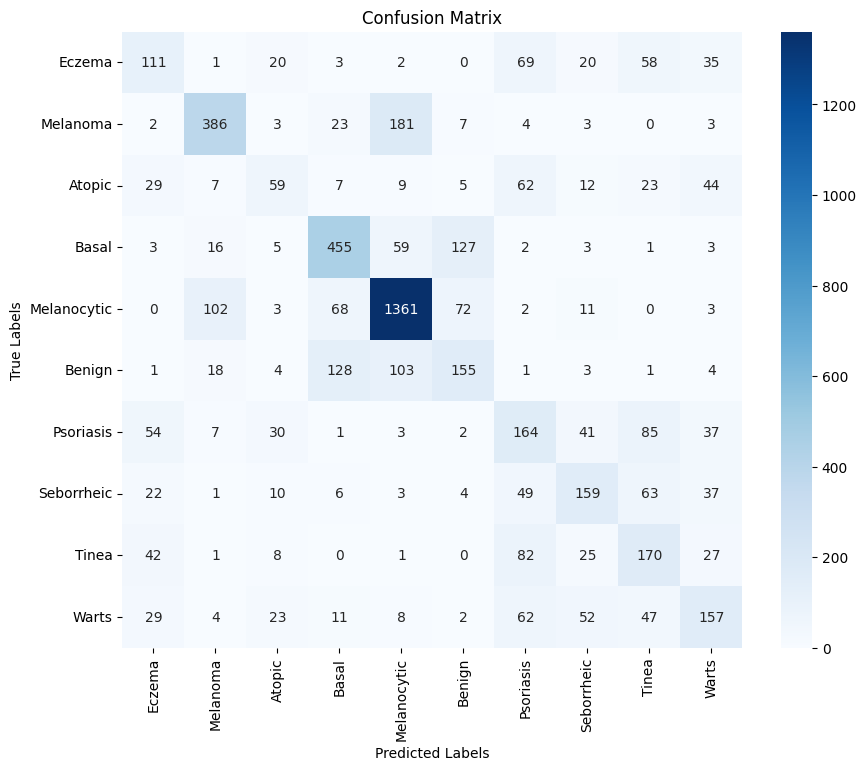

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(yTrue, yPred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


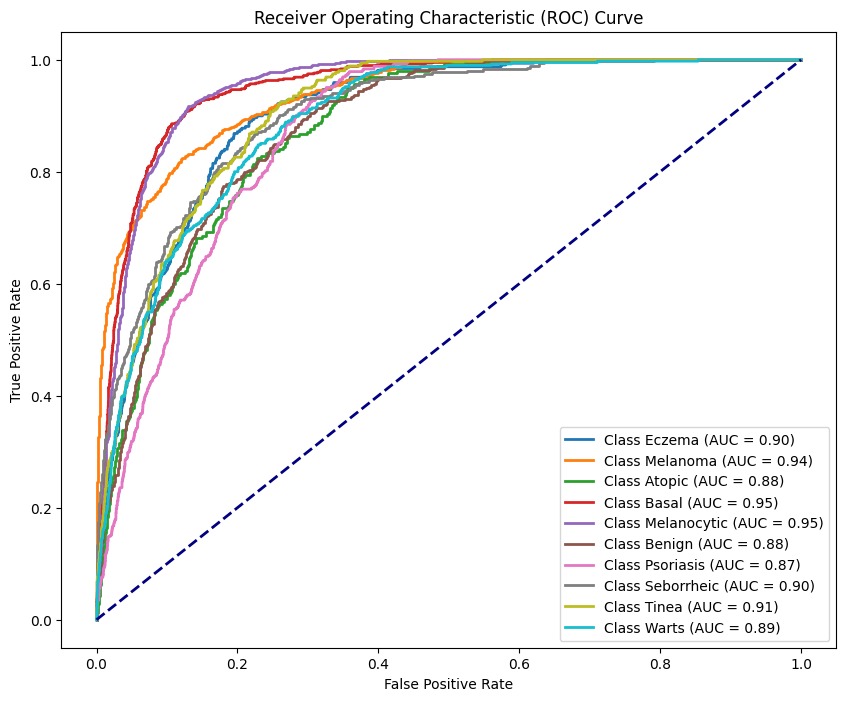

Classification Report:
              precision    recall  f1-score   support

      Eczema       0.38      0.35      0.36       319
    Melanoma       0.71      0.63      0.67       612
      Atopic       0.36      0.23      0.28       257
       Basal       0.65      0.68      0.66       674
 Melanocytic       0.79      0.84      0.81      1622
      Benign       0.41      0.37      0.39       418
   Psoriasis       0.33      0.39      0.36       424
  Seborrheic       0.48      0.45      0.47       354
       Tinea       0.38      0.48      0.42       356
       Warts       0.45      0.40      0.42       395

    accuracy                           0.58      5431
   macro avg       0.49      0.48      0.48      5431
weighted avg       0.58      0.58      0.58      5431



In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels for ROC curve (multi-class)
yTest_binarized = label_binarize(yTrue, classes=np.arange(10))  # 10 classes, binary format
yPred_binarized = model2.predict(xTest)

# Number of classes
n_classes = yTest_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# Initialize an empty list to store the AUC values for each class
roc_auc = []

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yTest_binarized[:, i], yPred_binarized[:, i])
    roc_auc.append(auc(fpr, tpr))
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labeling the axes and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the classification report for score by class
print("Classification Report:")
print(classification_report(yTrue, yPred_classes, target_names=class_names))


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


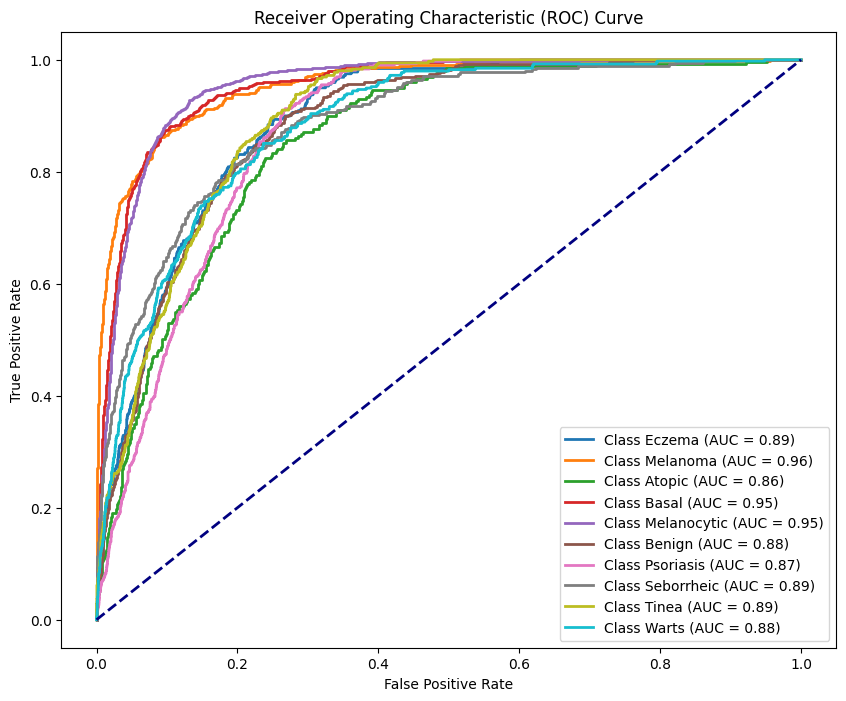

Classification Report:
              precision    recall  f1-score   support

      Eczema       0.38      0.35      0.36       319
    Melanoma       0.71      0.63      0.67       612
      Atopic       0.36      0.23      0.28       257
       Basal       0.65      0.68      0.66       674
 Melanocytic       0.79      0.84      0.81      1622
      Benign       0.41      0.37      0.39       418
   Psoriasis       0.33      0.39      0.36       424
  Seborrheic       0.48      0.45      0.47       354
       Tinea       0.38      0.48      0.42       356
       Warts       0.45      0.40      0.42       395

    accuracy                           0.58      5431
   macro avg       0.49      0.48      0.48      5431
weighted avg       0.58      0.58      0.58      5431



In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels for ROC curve (multi-class)
yTest_binarized = label_binarize(yTrue, classes=np.arange(10))  # 10 classes, binary format
yPred_binarized = model.predict(xTest)

# Number of classes
n_classes = yTest_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# Initialize an empty list to store the AUC values for each class
roc_auc = []

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yTest_binarized[:, i], yPred_binarized[:, i])
    roc_auc.append(auc(fpr, tpr))
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labeling the axes and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the classification report for score by class
print("Classification Report:")
print(classification_report(yTrue, yPred_classes, target_names=class_names))
